# Importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Padel

## Reading Datasets

### I will start by importing the fda approved dataset with descriptors, and the tox dataset with descriptors

In [2]:
PATH = "../../../../../../masters_data"

In [3]:
fda_approved = pd.read_csv(f"{PATH}/positive_datasets/fda_approved_padel.csv", low_memory=False)
print(fda_approved.shape)
fda_approved.head()

(1895, 1890)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,0.584582,0.374936,0.571502,0.512439,0.306739,2.733780,1.928357,4.843419,0.439277,1.390680
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,0.714216,0.229644,0.585899,0.500742,0.221070,3.368770,2.462690,6.183482,0.571324,1.307711
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,0.743521,0.238828,0.580284,0.491128,0.583759,3.188855,1.982036,5.272534,0.615281,1.655171
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,0.718681,0.194926,0.996729,0.516086,0.348846,3.606039,2.848015,7.021565,0.578022,1.861660
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
tox = pd.read_csv(f"{PATH}/negative_datasets/tox_padel.csv", low_memory=False)
print(tox.shape)
tox.head()

(7506, 1894)


,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,...,0.838189,0.126622,0.606581,0.344745,0.387288,14.141134,28.012871,52.715329,0.757283,1.338614
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,0.785835,0.148496,0.583339,0.510573,0.456906,12.109559,26.109518,51.827010,0.678752,1.550819
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,0.760167,0.166305,0.503928,0.476172,0.433299,14.251973,39.514896,80.675367,0.640251,1.413400
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,0.735183,0.175190,0.448228,0.429127,0.451800,14.380803,43.510324,92.222489,0.602775,1.329156
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.404732,0.348990,0.484932,0.528477,0.499562,4.501486,6.623541,14.298054,0.130583,1.512971


### Now I'll separate the calculated descriptors and the other columns in the datasets

In [5]:
# saving only the calculated descriptors

flag_columns = [
    "name",
    "chembl_id",
    "clean_smiles",
    "first_approval_year",
    "indication_class",
    "molecule_type",
    "withdrawn_flag",
    "therapeutic_flag",
    "polymer_flag",
    "inorganic_flag",
    "natural_product_flag",
    "parenteral",
    "topical",
    "oral",
    "ROMol",
]

fda_approved_features = fda_approved.drop(labels=flag_columns, axis=1)

print(fda_approved_features.shape)
fda_approved_features.head()

(1895, 1875)


,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0.0,-0.4695,0.220430,11.1997,8.393965,0.0,0.0,9.0,4.0,5.0,...,0.584582,0.374936,0.571502,0.512439,0.306739,2.733780,1.928357,4.843419,0.439277,1.390680
1,0.0,-1.0852,1.177659,15.4305,9.557965,0.0,0.0,10.0,5.0,5.0,...,0.714216,0.229644,0.585899,0.500742,0.221070,3.368770,2.462690,6.183482,0.571324,1.307711
2,0.0,-1.0880,1.183744,12.5072,8.231172,0.0,0.0,9.0,5.0,4.0,...,0.743521,0.238828,0.580284,0.491128,0.583759,3.188855,1.982036,5.272534,0.615281,1.655171
3,0.0,-0.2157,0.046526,22.3381,12.187551,0.0,0.0,11.0,4.0,7.0,...,0.718681,0.194926,0.996729,0.516086,0.348846,3.606039,2.848015,7.021565,0.578022,1.861660
4,0.0,-0.5895,0.347510,11.3934,11.222758,0.0,0.0,10.0,4.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# saving only the information variables (dropping ROMol)

flag_columns = [
    "name",
    "chembl_id",
    "clean_smiles",
    "first_approval_year",
    "indication_class",
    "molecule_type",
    "withdrawn_flag",
    "therapeutic_flag",
    "polymer_flag",
    "inorganic_flag",
    "natural_product_flag",
    "parenteral",
    "topical",
    "oral",
]

fda_approved_info = fda_approved[flag_columns]

print(fda_approved_info.shape)
fda_approved_info.head()

(1895, 14)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,natural_product_flag,parenteral,topical,oral
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,False,False,False,True
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,False,False,False,True
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,False,False,False,True
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,False,False,True,True
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,False,True,False,False


In [7]:
# saving only the calculated descriptors

flag_columns = [
    "NR-AR",
    "NR-AR-LBD",
    "NR-AhR",
    "NR-Aromatase",
    "NR-ER",
    "NR-ER-LBD",
    "NR-PPAR-gamma",
    "SR-ARE",
    "SR-ATAD5",
    "SR-HSE",
    "SR-MMP",
    "SR-p53",
    "mol_id",
    "smiles",
    "stripped_salt_smiles",
    "neutralized_smiles",
    "inchi",
    "duplicated",
    "ROMol"
]

tox_features = tox.drop(labels=flag_columns, axis=1)

print(tox_features.shape)
tox_features.head()

(7506, 1875)


,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0.0,-0.1473,0.021697,30.5447,32.913930,9.0,10.0,26.0,16.0,10.0,...,0.838189,0.126622,0.606581,0.344745,0.387288,14.141134,28.012871,52.715329,0.757283,1.338614
1,0.0,-0.5556,0.308691,28.1974,31.165516,6.0,6.0,27.0,15.0,12.0,...,0.785835,0.148496,0.583339,0.510573,0.456906,12.109559,26.109518,51.827010,0.678752,1.550819
2,0.0,0.2521,0.063554,83.0036,57.339376,0.0,0.0,53.0,21.0,32.0,...,0.760167,0.166305,0.503928,0.476172,0.433299,14.251973,39.514896,80.675367,0.640251,1.413400
3,0.0,0.3962,0.156974,56.9898,51.592204,6.0,6.0,48.0,20.0,28.0,...,0.735183,0.175190,0.448228,0.429127,0.451800,14.380803,43.510324,92.222489,0.602775,1.329156
4,4.0,-0.8018,0.642883,33.3638,21.728344,0.0,0.0,19.0,11.0,8.0,...,0.404732,0.348990,0.484932,0.528477,0.499562,4.501486,6.623541,14.298054,0.130583,1.512971


In [8]:
# saving only the information variables (dropping ROMol)

flag_columns = [
    "NR-AR",
    "NR-AR-LBD",
    "NR-AhR",
    "NR-Aromatase",
    "NR-ER",
    "NR-ER-LBD",
    "NR-PPAR-gamma",
    "SR-ARE",
    "SR-ATAD5",
    "SR-HSE",
    "SR-MMP",
    "SR-p53",
    "mol_id",
    "smiles",
    "stripped_salt_smiles",
    "neutralized_smiles",
    "inchi",
    "duplicated",
]

tox_info = tox[flag_columns]

print(tox_info.shape)
tox_info.head()

(7506, 18)


,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles,stripped_salt_smiles,neutralized_smiles,inchi,duplicated
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1,CCOc1ccc2nc(S(N)(=O)=O)sc2c1,CCOc1ccc2nc(S(N)(=O)=O)sc2c1,InChI=1S/C9H10N2O3S2/c1-2-14-6-3-4-7-8(5-6)15-...,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O,CCN1C(=O)NC(c2ccccc2)C1=O,CCN1C(=O)NC(c2ccccc2)C1=O,InChI=1S/C11H12N2O2/c1-2-13-10(14)9(12-11(13)1...,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX3024,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...,InChI=1S/C20H32O/c1-3-20(21)13-11-18-17-9-8-14...,False
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C,InChI=1S/C17H28N2O/c1-6-12-19(8-3)15(7-2)17(20...,False
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O,CC(O)(P(=O)(O)O)P(=O)(O)O,CC(O)(P(=O)(O)O)P(=O)(O)O,"InChI=1S/C2H8O7P2/c1-2(3,10(4,5)6)11(7,8)9/h3H...",True


### Now I'll merge them in one dataset

In [9]:
# merging calculated descriptors

molecules_features = pd.concat([fda_approved_features, tox_features], axis=0)
print(molecules_features.shape)
molecules_features.head()

(9401, 1875)


,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0.0,-0.4695,0.220430,11.1997,8.393965,0.0,0.0,9.0,4.0,5.0,...,0.584582,0.374936,0.571502,0.512439,0.306739,2.733780,1.928357,4.843419,0.439277,1.390680
1,0.0,-1.0852,1.177659,15.4305,9.557965,0.0,0.0,10.0,5.0,5.0,...,0.714216,0.229644,0.585899,0.500742,0.221070,3.368770,2.462690,6.183482,0.571324,1.307711
2,0.0,-1.0880,1.183744,12.5072,8.231172,0.0,0.0,9.0,5.0,4.0,...,0.743521,0.238828,0.580284,0.491128,0.583759,3.188855,1.982036,5.272534,0.615281,1.655171
3,0.0,-0.2157,0.046526,22.3381,12.187551,0.0,0.0,11.0,4.0,7.0,...,0.718681,0.194926,0.996729,0.516086,0.348846,3.606039,2.848015,7.021565,0.578022,1.861660
4,0.0,-0.5895,0.347510,11.3934,11.222758,0.0,0.0,10.0,4.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# merging molecules info

molecules_info = pd.concat([fda_approved_info, tox_info], axis=0)
print(molecules_info.shape)
molecules_info.head()

(9401, 32)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles,stripped_salt_smiles,neutralized_smiles,inchi,duplicated
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checking for Non-Numeric Values

In [11]:
def display_non_numeric_values(df):
    non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

    for column in non_numeric_columns:
        unique_values = df[column].unique()
        print(f"Column '{column}': {unique_values}")

In [12]:
display_non_numeric_values(molecules_features)

We have no non-numeric values to deal with

In [13]:
print(molecules_features.shape)
molecules_features.head()

(9401, 1875)


,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0.0,-0.4695,0.220430,11.1997,8.393965,0.0,0.0,9.0,4.0,5.0,...,0.584582,0.374936,0.571502,0.512439,0.306739,2.733780,1.928357,4.843419,0.439277,1.390680
1,0.0,-1.0852,1.177659,15.4305,9.557965,0.0,0.0,10.0,5.0,5.0,...,0.714216,0.229644,0.585899,0.500742,0.221070,3.368770,2.462690,6.183482,0.571324,1.307711
2,0.0,-1.0880,1.183744,12.5072,8.231172,0.0,0.0,9.0,5.0,4.0,...,0.743521,0.238828,0.580284,0.491128,0.583759,3.188855,1.982036,5.272534,0.615281,1.655171
3,0.0,-0.2157,0.046526,22.3381,12.187551,0.0,0.0,11.0,4.0,7.0,...,0.718681,0.194926,0.996729,0.516086,0.348846,3.606039,2.848015,7.021565,0.578022,1.861660
4,0.0,-0.5895,0.347510,11.3934,11.222758,0.0,0.0,10.0,4.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checking for Infinity Values

### Here, we check for infinity values. If present, we replace them for NaN, to deal with later.

In [14]:

# Count the number of infinity values in the dataset
num_infinity = np.sum(np.isinf(molecules_features))
print(f"Number of Infinity Values (np.inf) before replacing it with NaN: {num_infinity.sum()}")

# Replacing the negative and positive infinity values with nan
molecules_features_no_inf = molecules_features.replace([np.inf, -np.inf], np.nan)

# Count the number of infinity values in the dataset
num_infinity = np.sum(np.isinf(molecules_features_no_inf))

print(f"Number of Infinity Values (np.inf), after replacing it with NaN: {num_infinity.sum()}")

Number of Infinity Values (np.inf) before replacing it with NaN: 97
Number of Infinity Values (np.inf), after replacing it with NaN: 0


In [15]:
print(molecules_features_no_inf.shape)
molecules_features_no_inf.head()

(9401, 1875)


,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0.0,-0.4695,0.220430,11.1997,8.393965,0.0,0.0,9.0,4.0,5.0,...,0.584582,0.374936,0.571502,0.512439,0.306739,2.733780,1.928357,4.843419,0.439277,1.390680
1,0.0,-1.0852,1.177659,15.4305,9.557965,0.0,0.0,10.0,5.0,5.0,...,0.714216,0.229644,0.585899,0.500742,0.221070,3.368770,2.462690,6.183482,0.571324,1.307711
2,0.0,-1.0880,1.183744,12.5072,8.231172,0.0,0.0,9.0,5.0,4.0,...,0.743521,0.238828,0.580284,0.491128,0.583759,3.188855,1.982036,5.272534,0.615281,1.655171
3,0.0,-0.2157,0.046526,22.3381,12.187551,0.0,0.0,11.0,4.0,7.0,...,0.718681,0.194926,0.996729,0.516086,0.348846,3.606039,2.848015,7.021565,0.578022,1.861660
4,0.0,-0.5895,0.347510,11.3934,11.222758,0.0,0.0,10.0,4.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Scaling the data

### Scaling is necessary so every variable is on the same scale and are comparable to each other. Non-parametric imputation as kNN are very sensible to the scale of the variables, so this is mandatory step.

In [16]:
# scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(molecules_features_no_inf)

# Merging the column name with the scale data array
molecules_features_scaled = pd.DataFrame(scaled_data, columns=molecules_features.columns)
print(molecules_features_scaled.shape)
molecules_features_scaled.head()

(9401, 1875)


,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,-0.369215,-0.106497,-0.316840,-1.068125,-1.464726,-1.088454,-1.086392,-1.328836,-1.436896,-1.117243,...,-0.967804,1.585285,0.092915,0.382659,-0.109091,-1.069138,-0.613313,-0.540432,-0.804697,-0.001866
1,-0.369215,-0.449912,-0.218099,-0.944593,-1.416895,-1.088454,-1.086392,-1.283908,-1.345656,-1.117243,...,-0.044771,0.187377,0.136742,0.294846,-0.221004,-1.012219,-0.605589,-0.532319,-0.120262,-0.083666
2,-0.369215,-0.451474,-0.217472,-1.029948,-1.471415,-1.088454,-1.086392,-1.328836,-1.345656,-1.198034,...,0.163884,0.275735,0.119649,0.222673,0.252796,-1.028346,-0.612537,-0.537834,0.107576,0.258902
3,-0.369215,0.035064,-0.334779,-0.742902,-1.308841,-1.088454,-1.086392,-1.238981,-1.436896,-0.955660,...,-0.012979,-0.146656,1.387394,0.410036,-0.054084,-0.990950,-0.600019,-0.527245,-0.085547,0.462484
4,-0.369215,-0.173428,-0.303731,-1.062470,-1.348486,-1.088454,-1.086392,-1.283908,-1.436896,-1.036451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checking NaN molecules

In [17]:
print(f"Number of NaN: {molecules_features_scaled.isna().sum().sum()}")

Number of NaN: 968974


There are 1968 rows with at least one NaN value.


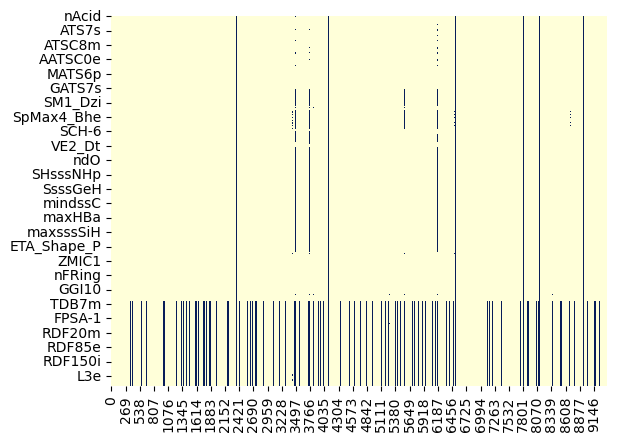

In [18]:
molecules_features_scaled[molecules_features_scaled.isnull().any(axis=1)]
print(f'There are {molecules_features_scaled[molecules_features_scaled.isnull().any(axis=1)].shape[0]} rows with at least one NaN value.')
g = sns.heatmap(molecules_features_scaled.isna().transpose(), cmap="YlGnBu", cbar=False)

There are some rows with only NaN, as PaDeL is somewhat known for being rather inefficient and retrieve a lot of errors. In the end of the notebook, the molecules are going to be dropped. I won't drop them now, because it would raise an error later on the concatenation step.

In [19]:
def find_rows_with_only_nan(df) -> list:
    """
    Recieves a dataset and returns the index of the rows with only NA values
    """
    nan_rows = df[df.isna().all(axis=1)]
    nan_rows_index = nan_rows.index.tolist()
    return nan_rows_index

In [20]:
molecules_to_remove = find_rows_with_only_nan(molecules_features_scaled)
print(f' There are {len(molecules_to_remove)} rows to remove')

 There are 88 rows to remove


### Get Names of Mostly NaN descriptors

Some descriptors have a lot of NA values. They can add noise to the dataset, but they can also contain important information with the structures with adequate computation. We will test to create models with both datasets, to see which one is better. Here, we will save the names of the descriptors that have lots of NaN, and drop them in the end of the notebook.

In [21]:
def get_nan_columns(df: pd.DataFrame, fraction: float):
    threshold = df.shape[0] * fraction
    columns = []
    for column in df.columns:
        if df[column].isna().sum() >= threshold:
            columns.append(column)
    return columns

In [22]:
columns_to_remove = get_nan_columns(molecules_features_scaled, fraction=0.1)
print(f'There are {len(columns_to_remove)} columns (descriptors) that have a lot of NaN values')

There are 431 columns (descriptors) that have a lot of NaN values


## k-Nearest Neighbor (Imputation of NaN values)

KNN imputation is effective for certain situations:

- Good for continuous numerical data with unpredictable missing values.
- Suitable when similar data points share similar values and there's a clear data structure.
- Works well for small to medium-sized datasets with manageable computational cost.
- Captures complex relationships with multiple features.
- Doesn't assume linearity and handles outliers.
  
However, KNN may not be ideal:

- In high-dimensional data due to the "curse of dimensionality."
- With highly sparse data, leading to unreliable imputations.
- For large datasets due to computational intensity.
- For categorical data (better for numerical data).
- In imbalanced datasets favoring majority class imputations.

Before using KNN, explore data and compare with other imputation methods for best performance.

Source: ChatGPT

It's important to note that, even though KNN seems very good for this situation, High Dimensionality is a problem here.

In [23]:
print(f"Number of Nan values: {molecules_features_scaled.isna().sum().sum()}")

Number of Nan values: 968974


In [24]:
selector = KNNImputer(n_neighbors=5)
explanatory_variables_fill_na = selector.fit_transform(molecules_features_scaled)

In [25]:
explanatory_variables_no_na = pd.DataFrame(explanatory_variables_fill_na, columns=molecules_features_scaled.columns)
print(explanatory_variables_no_na.shape)
explanatory_variables_no_na.head()

(9401, 1875)


,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,-0.369215,-0.106497,-0.316840,-1.068125,-1.464726,-1.088454,-1.086392,-1.328836,-1.436896,-1.117243,...,-0.967804,1.585285,0.092915,0.382659,-0.109091,-1.069138,-0.613313,-0.540432,-0.804697,-0.001866
1,-0.369215,-0.449912,-0.218099,-0.944593,-1.416895,-1.088454,-1.086392,-1.283908,-1.345656,-1.117243,...,-0.044771,0.187377,0.136742,0.294846,-0.221004,-1.012219,-0.605589,-0.532319,-0.120262,-0.083666
2,-0.369215,-0.451474,-0.217472,-1.029948,-1.471415,-1.088454,-1.086392,-1.328836,-1.345656,-1.198034,...,0.163884,0.275735,0.119649,0.222673,0.252796,-1.028346,-0.612537,-0.537834,0.107576,0.258902
3,-0.369215,0.035064,-0.334779,-0.742902,-1.308841,-1.088454,-1.086392,-1.238981,-1.436896,-0.955660,...,-0.012979,-0.146656,1.387394,0.410036,-0.054084,-0.990950,-0.600019,-0.527245,-0.085547,0.462484
4,-0.369215,-0.173428,-0.303731,-1.062470,-1.348486,-1.088454,-1.086392,-1.283908,-1.436896,-1.036451,...,-1.492452,1.118393,0.070771,-0.101068,0.075849,-1.037387,-0.599612,-0.528720,-1.555339,0.067011


Number of Nan values: 0


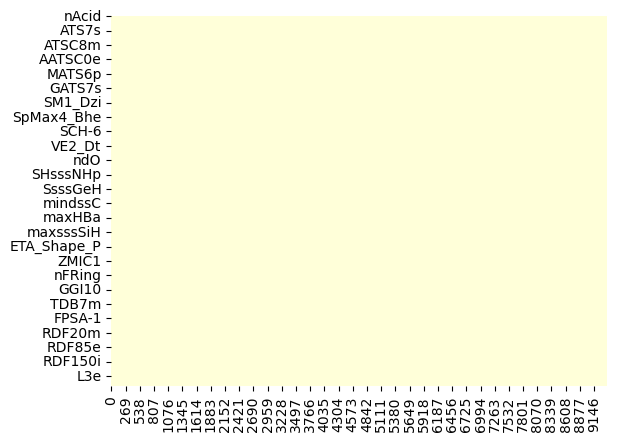

In [26]:
print(f"Number of Nan values: {explanatory_variables_no_na.isna().sum().sum()}")
g = sns.heatmap(explanatory_variables_no_na.isna().transpose(), cmap="YlGnBu", cbar=False)

## Zero Variance Filter

### Below is a function that removes columns with variance belowe a threshold. We will use 0 as a threshold, to keep only the molecules with non-zero variance. 

In [27]:
def variance_threshold_selector(data, threshold=0.0):
    """
    Recieves a dataframe and returns the non-zero variance dataframe
    data: scaled dataframe
    threshold: minimum variance
    """
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [28]:
molecules_features_no_low_var = variance_threshold_selector(explanatory_variables_no_na, threshold=0)
print(molecules_features_no_low_var.shape)
molecules_features_no_low_var.head()

(9401, 1693)


,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,-0.369215,-0.106497,-0.316840,-1.068125,-1.464726,-1.088454,-1.086392,-1.328836,-1.436896,-1.117243,...,-0.967804,1.585285,0.092915,0.382659,-0.109091,-1.069138,-0.613313,-0.540432,-0.804697,-0.001866
1,-0.369215,-0.449912,-0.218099,-0.944593,-1.416895,-1.088454,-1.086392,-1.283908,-1.345656,-1.117243,...,-0.044771,0.187377,0.136742,0.294846,-0.221004,-1.012219,-0.605589,-0.532319,-0.120262,-0.083666
2,-0.369215,-0.451474,-0.217472,-1.029948,-1.471415,-1.088454,-1.086392,-1.328836,-1.345656,-1.198034,...,0.163884,0.275735,0.119649,0.222673,0.252796,-1.028346,-0.612537,-0.537834,0.107576,0.258902
3,-0.369215,0.035064,-0.334779,-0.742902,-1.308841,-1.088454,-1.086392,-1.238981,-1.436896,-0.955660,...,-0.012979,-0.146656,1.387394,0.410036,-0.054084,-0.990950,-0.600019,-0.527245,-0.085547,0.462484
4,-0.369215,-0.173428,-0.303731,-1.062470,-1.348486,-1.088454,-1.086392,-1.283908,-1.436896,-1.036451,...,-1.492452,1.118393,0.070771,-0.101068,0.075849,-1.037387,-0.599612,-0.528720,-1.555339,0.067011


## Descale the Data

Now, we need to restore the data to the way it way before scaling. We do this fo rtwo reasons:

1. Some models need to be calculated on scaled data, some can't be.

2. For the models that need to use scaled data, the scaling process needs to be done separatly for the training and the testing datasets.

For descaling, it's essential to utilize the identical scaler object employed for the initial data scaling. However, the scaler object was originally fitted to the complete dataset, and along the notebook, several columns from that dataset were removed. We'll craft a provisional dataset that retains the original data but only has the selected columns. This new dataset will be scaled using a new scaler object, enabling us to accurately descale the data.


In [29]:
# creating temporary dataset
drugs_scaler = molecules_features_no_inf[molecules_features_no_low_var.columns].copy()
drugs_scaler.shape

(9401, 1693)

In [30]:
# fitting the scaler object to the temporary dataset
descaler = StandardScaler()
_ = descaler.fit_transform(drugs_scaler)

In [31]:
# descaling
molecules_features_descaled = descaler.inverse_transform(molecules_features_no_low_var)
molecules_features_descaled = pd.DataFrame(molecules_features_descaled, columns=molecules_features_no_low_var.columns)

print(molecules_features_descaled.shape)
molecules_features_descaled.head()

(9401, 1693)


,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0.0,-0.4695,0.220430,11.1997,8.393965,0.0,0.0,9.0,4.0,5.0,...,0.584582,0.374936,0.571502,0.512439,0.306739,2.733780,1.928357,4.843419,0.439277,1.390680
1,0.0,-1.0852,1.177659,15.4305,9.557965,0.0,0.0,10.0,5.0,5.0,...,0.714216,0.229644,0.585899,0.500742,0.221070,3.368770,2.462690,6.183482,0.571324,1.307711
2,0.0,-1.0880,1.183744,12.5072,8.231172,0.0,0.0,9.0,5.0,4.0,...,0.743521,0.238828,0.580284,0.491128,0.583759,3.188855,1.982036,5.272534,0.615281,1.655171
3,0.0,-0.2157,0.046526,22.3381,12.187551,0.0,0.0,11.0,4.0,7.0,...,0.718681,0.194926,0.996729,0.516086,0.348846,3.606039,2.848015,7.021565,0.578022,1.861660
4,0.0,-0.5895,0.347510,11.3934,11.222758,0.0,0.0,10.0,4.0,6.0,...,0.510898,0.326410,0.564228,0.448004,0.448308,3.087994,2.876185,6.777973,0.294457,1.460541


Here we can compare a few columns of the dataset before the feature selection, and after descaling

In [32]:
molecules_features_descaled[["ALogP", "ALogp2", "E3s", "Ks"]]

,ALogP,ALogp2,E3s,Ks
0,-0.4695,0.220430,0.306739,0.439277
1,-1.0852,1.177659,0.221070,0.571324
2,-1.0880,1.183744,0.583759,0.615281
3,-0.2157,0.046526,0.348846,0.578022
4,-0.5895,0.347510,0.448308,0.294457
...,...,...,...,...
9396,-0.4368,0.190794,0.337426,0.491388
9397,0.9172,0.841256,0.444223,0.566153
9398,0.2615,0.068382,0.441917,0.557821
9399,-0.4699,0.220806,0.416383,0.561377


In [33]:
molecules_features[["ALogP", "ALogp2", "E3s", "Ks"]]

,ALogP,ALogp2,E3s,Ks
0,-0.4695,0.220430,0.306739,0.439277
1,-1.0852,1.177659,0.221070,0.571324
2,-1.0880,1.183744,0.583759,0.615281
3,-0.2157,0.046526,0.348846,0.578022
4,-0.5895,0.347510,NaN,NaN
...,...,...,...,...
7501,-0.4368,0.190794,0.337426,0.491388
7502,0.9172,0.841256,0.444223,0.566153
7503,0.2615,0.068382,0.441917,0.557821
7504,-0.4699,0.220806,0.416383,0.561377


## Re-join Info and Features Datasets

In [34]:
molecules_info = molecules_info.reset_index(drop=True)
molecules_features_descaled = molecules_features_descaled.reset_index(drop=True)

In [35]:
molecules_processed = pd.concat([molecules_info, molecules_features_descaled], axis=1)
print(molecules_processed.shape)
molecules_processed.head()

(9401, 1725)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,0.584582,0.374936,0.571502,0.512439,0.306739,2.733780,1.928357,4.843419,0.439277,1.390680
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,0.714216,0.229644,0.585899,0.500742,0.221070,3.368770,2.462690,6.183482,0.571324,1.307711
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,0.743521,0.238828,0.580284,0.491128,0.583759,3.188855,1.982036,5.272534,0.615281,1.655171
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,0.718681,0.194926,0.996729,0.516086,0.348846,3.606039,2.848015,7.021565,0.578022,1.861660
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,0.510898,0.326410,0.564228,0.448004,0.448308,3.087994,2.876185,6.777973,0.294457,1.460541


## Drop Molecules that only had NaN Values

### We have selected a few molecules that had only NaN values. For them, the KNN inputs will most likely be imprecise, so the molecules will be dropped.

In [36]:
molecules_processed_no_na = molecules_processed.drop(molecules_to_remove, axis=0)
print(molecules_processed_no_na.shape)
molecules_processed_no_na.head()

(9313, 1725)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,0.584582,0.374936,0.571502,0.512439,0.306739,2.733780,1.928357,4.843419,0.439277,1.390680
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,0.714216,0.229644,0.585899,0.500742,0.221070,3.368770,2.462690,6.183482,0.571324,1.307711
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,0.743521,0.238828,0.580284,0.491128,0.583759,3.188855,1.982036,5.272534,0.615281,1.655171
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,0.718681,0.194926,0.996729,0.516086,0.348846,3.606039,2.848015,7.021565,0.578022,1.861660
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,0.510898,0.326410,0.564228,0.448004,0.448308,3.087994,2.876185,6.777973,0.294457,1.460541


## Drop Columns With High NaN Count

### Here we will drop the columns that have a lot of NaN values. With this, all the NaN values filled by the KNN technique will be dropped. We will save both datasets with and without those columns, to test which performs better to train models.

In [37]:
molecules_processed_no_high_na_features = molecules_processed_no_na.drop(columns_to_remove, axis=1)
print(molecules_processed_no_high_na_features.shape)
molecules_processed_no_high_na_features.head()

(9313, 1294)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,6.560927,6.732051,1.683013,6.732051,0.000000,6.732051,9.0,0.0,-0.646,12.0
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,7.503203,8.696802,1.739360,7.228927,4.642168,2.586760,18.0,2.0,-0.728,16.0
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,8.447475,8.696802,1.739360,9.541980,4.642168,4.899812,18.0,2.0,-1.606,16.0
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,7.002720,6.871320,1.717830,4.621320,0.000000,2.310660,10.0,1.0,0.106,10.0
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,7.801394,6.732051,1.683013,4.976068,2.244017,0.000000,9.0,0.0,-0.786,12.0


## Save Datasets

In [38]:
molecules_processed_no_na.to_csv(f"{PATH}/pre_processed_datasets/pre_processed_tox_padel_with_inputation.csv" ,index=False)
molecules_processed_no_high_na_features.to_csv(f"{PATH}/pre_processed_datasets/pre_processed_tox_padel_no_inputation.csv" ,index=False)